In [1]:
import pandas as pd
import numpy as np

# 数据处理

In [3]:
data = pd.read_excel(r'C:\Users\zero\Desktop\5homework.xlsx')
del data['Day']
data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data["PlayTennis"] = data["PlayTennis"].replace({"No": 0, "Yes": 1})
data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rain,Mild,High,Weak,1
4,Rain,Cool,Normal,Weak,1
5,Rain,Cool,Normal,Strong,0
6,Overcast,Cool,Normal,Strong,1
7,Sunny,Mild,High,Weak,0
8,Sunny,Cool,Normal,Weak,1
9,Rain,Mild,Normal,Weak,1


In [7]:
cols = data.shape[1]
X_data = data.iloc[:, 0:cols-1]
Y_data = data.iloc[:, cols-1:cols]

In [8]:
featuresNames = X_data.columns
for feature in featuresNames:   
    x_unique = list(set(X_data[feature]))
    print(x_unique)

['Sunny', 'Rain', 'Overcast']
['Hot', 'Cool', 'Mild']
['High', 'Normal']
['Strong', 'Weak']


# 贝叶斯模型

In [9]:
class Naïve_Bayes_Classifier:
    def __init__(self, X_data, Y_data):
        self.X = X_data.values
        self.y = Y_data.values
    def Naive_Bayes(self,X_data, Y_data):   
        #计算先验概率
        y_unique = np.unique(self.y) 
        prior_prob = np.zeros(len(y_unique))
        for i in range(len(y_unique)):     #计算每个类别的先验概率
            prior_prob[i] = np.sum(self.y == y_unique[i]) / len(self.y)  
        #计算条件概率（似然值）
        condition_prob = {}
        featuresNames = X_data.columns
        for feature in featuresNames:
            x_unique = list(set(X_data[feature])) #每个特征下特征的取值
            x_condition_prob = np.zeros((len(y_unique), len(x_unique))) 
            for i in range(len(y_unique)): #计算每个类别下每个特征各个取值的条件概率
                for j in range(len(x_unique)):
                    x_condition_prob[i, j] = np.sum((X_data[feature] == x_unique[j]) & (Y_data.PlayTennis == y_unique[i]))\
                    / np.sum(self.y == y_unique[i])
            x_condition_prob = pd.DataFrame(x_condition_prob, columns=x_unique,index=y_unique)
            condition_prob[feature] = x_condition_prob    #存储每个特征下特征取值的条件概率
        return prior_prob, condition_prob
    def predict(self, test_data,prior,conditional_prob):
        numclass = prior.shape[0] #类别数
        featuresNames = test_data.columns #特征名
        numsamples = test_data.shape[0] #测试样本数
        post_prob = np.zeros((numsamples, numclass)) #后验概率
        for k in range(numsamples): #对每个测试样本计算后验概率
            prob_k = np.zeros((numclass,)) #存储每个类别的概率
            for i in range(numclass): #对每个类别计算后验概率
                pri = prior[i]    
                for feature in featuresNames: #对每个特征计算条件概率
                    feat_val = test_data[feature][k] #取出某个特征下的第k个样本的特征值
                    cp = conditional_prob[feature] #取出该特征的条件概率
                    cp_val = cp.loc[i, feat_val] #取出该特征值的条件概率
                    pri*=cp_val     #计算后验概率
                prob_k[i] = pri
            prob = prob_k / np.sum(prob_k, axis=0) #归一化
            post_prob[k, :] = prob #存储后验概率
        return post_prob

        

In [10]:
my_model = Naïve_Bayes_Classifier(X_data, Y_data)
prior_prob,conditional_prob = my_model.Naive_Bayes(X_data, Y_data)
print(prior_prob)
print(conditional_prob['Outlook'])
print(conditional_prob['Temperature'])
print(conditional_prob['Humidity'])
print(conditional_prob['Wind'])

[0.35714286 0.64285714]
      Sunny      Rain  Overcast
0  0.600000  0.400000  0.000000
1  0.222222  0.333333  0.444444
        Hot      Cool      Mild
0  0.400000  0.200000  0.400000
1  0.222222  0.333333  0.444444
       High    Normal
0  0.800000  0.200000
1  0.333333  0.666667
     Strong      Weak
0  0.600000  0.400000
1  0.333333  0.666667


# 测试

In [11]:
test_data = [['Sunny','Cool','High', 'Strong']]
test_Data = pd. DataFrame(test_data, columns=['Outlook' , 'Temperature' ,'Humidity', 'Wind'])
postPrior = my_model.predict(test_Data, prior_prob, conditional_prob)
postPrior #第一列表示no的概率，第二列表示yes的概率



array([[0.79541735, 0.20458265]])

In [12]:
if(postPrior[0,0]>postPrior[0,1]):
    print('No')
else:  
    print('Yes')

No


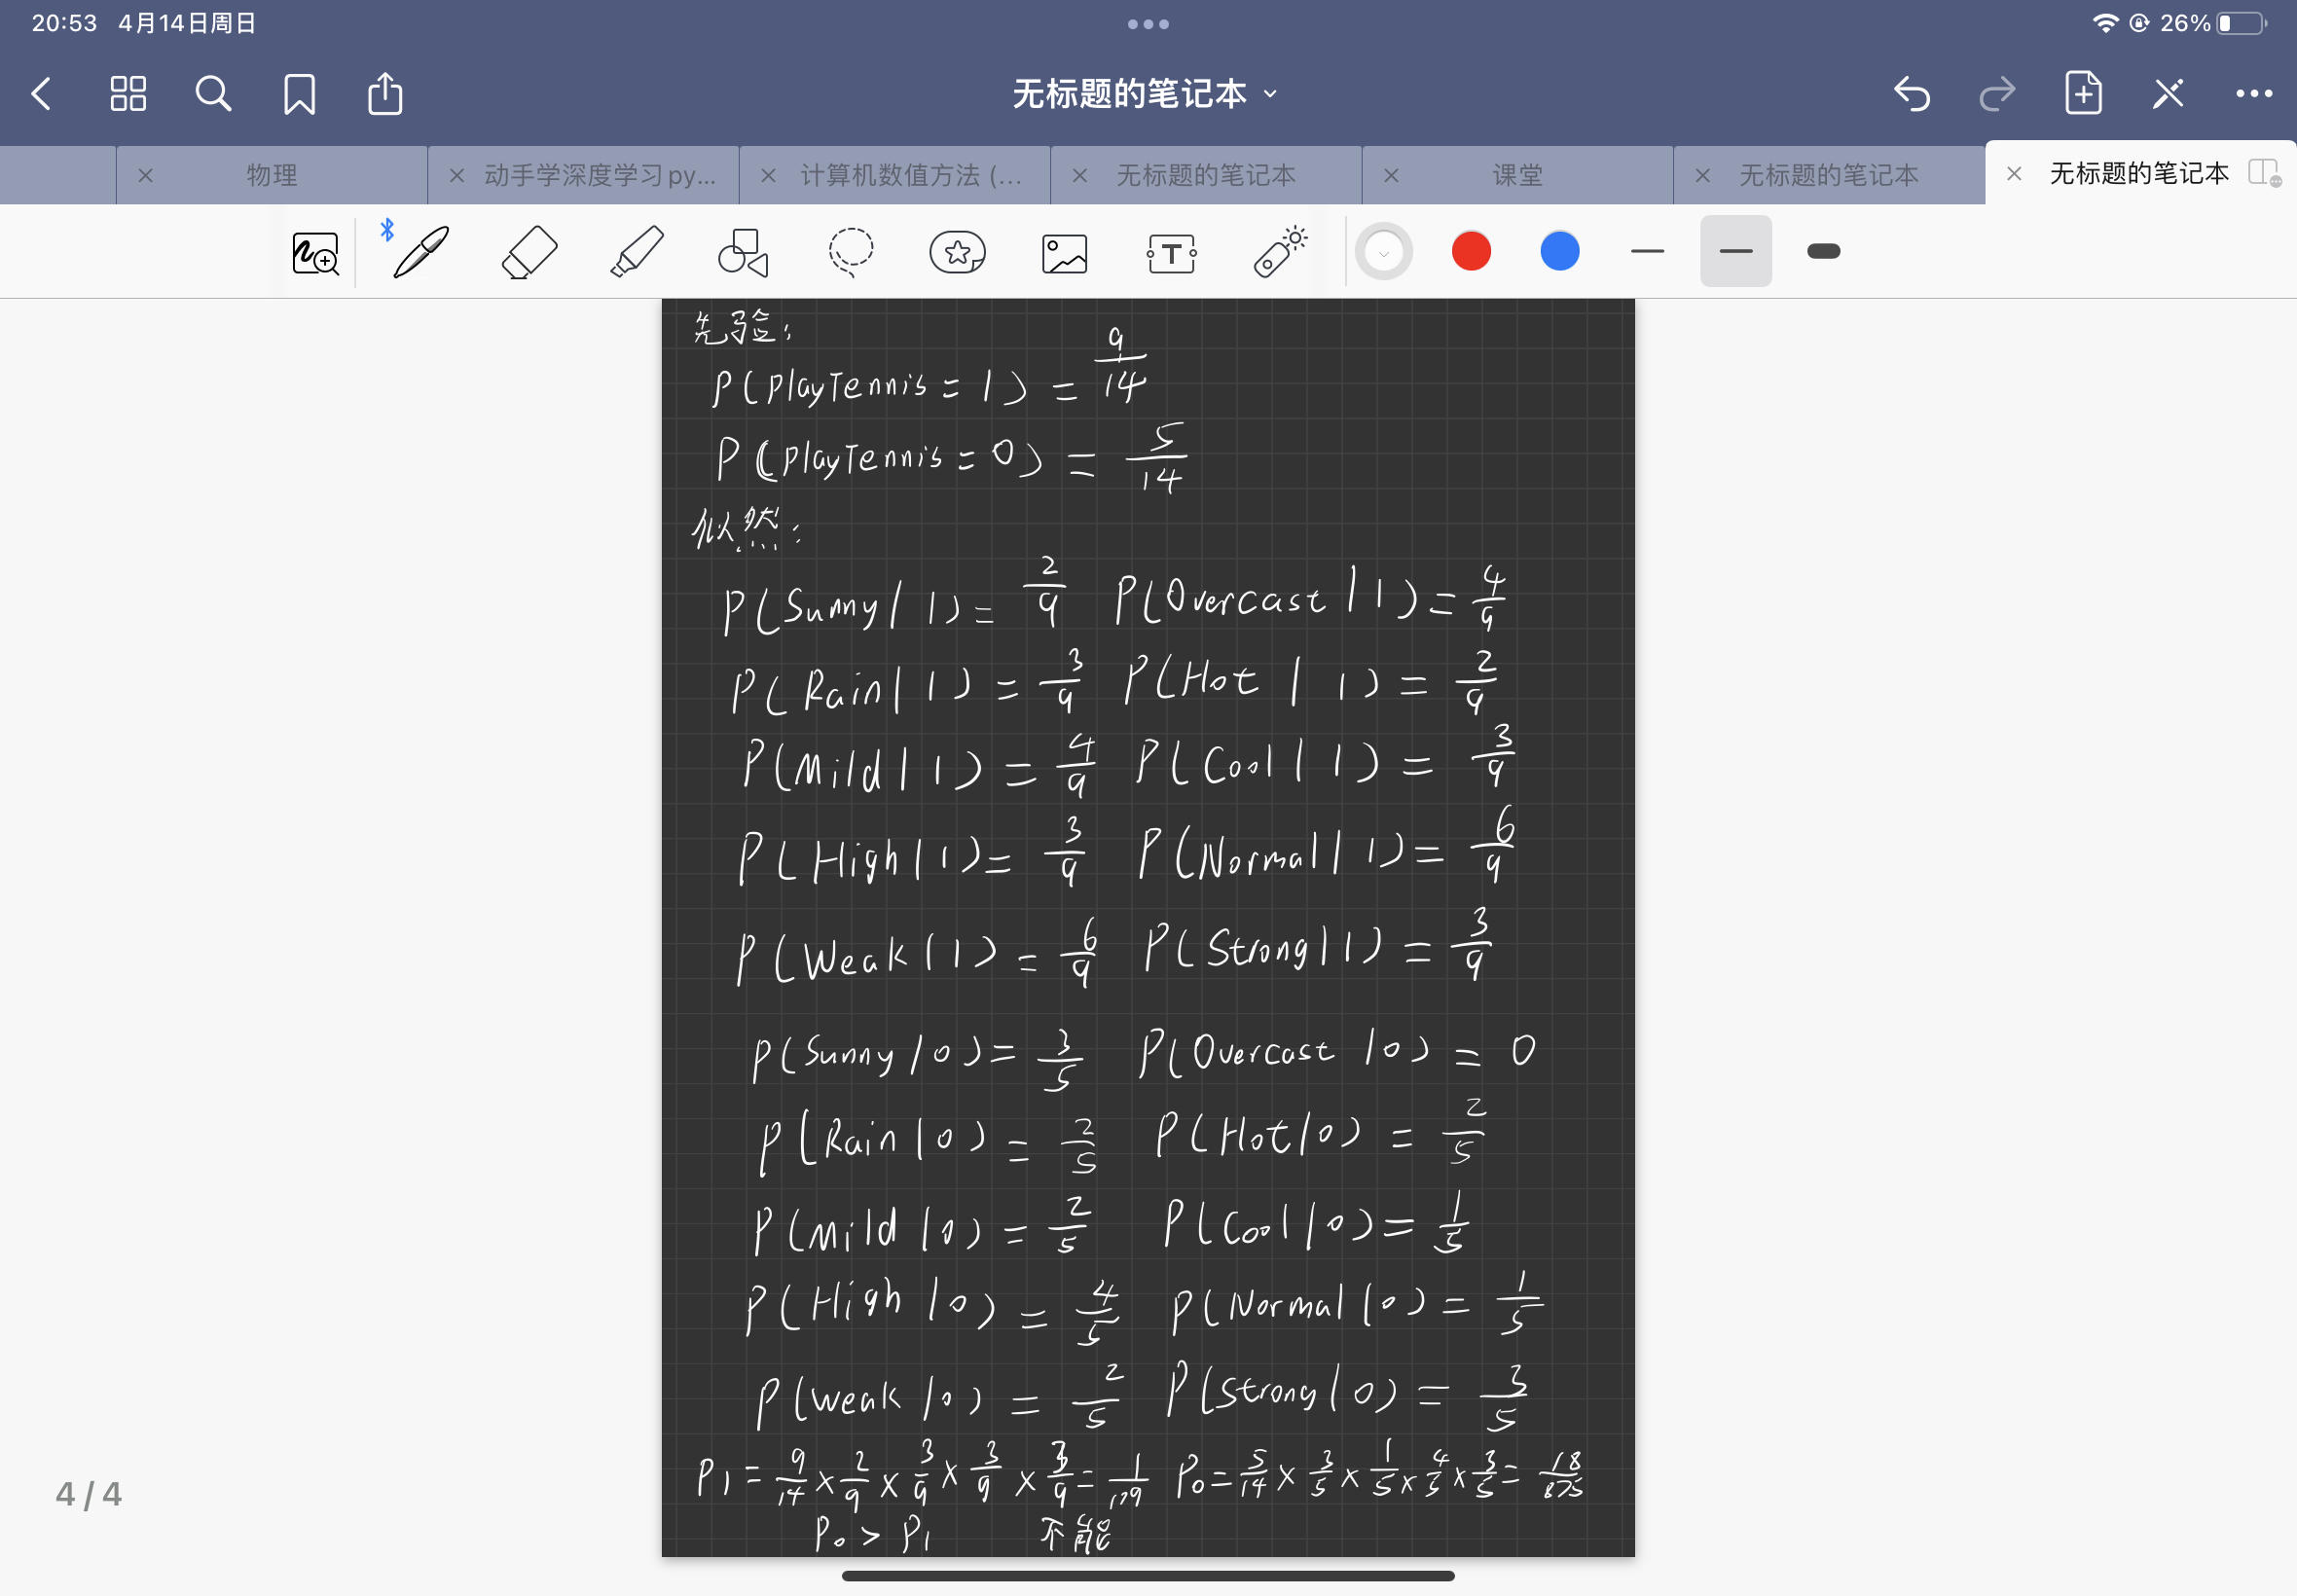